In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
dfe = pd.read_csv('C:/Users/dtulomba/Documents/DOSSIER_PROJET_AI/OneDrive_2023-09-14/Wind Turbine Component Temperature Prediction/dfe.csv', index_col=0, parse_dates=True)
df_train = pd.read_csv('C:/Users/dtulomba/Documents/DOSSIER_PROJET_AI/OneDrive_2023-09-14/Wind Turbine Component Temperature Prediction/df_train.csv', index_col=0, parse_dates=True)
df_test = pd.read_csv('C:/Users/dtulomba/Documents/DOSSIER_PROJET_AI/OneDrive_2023-09-14/Wind Turbine Component Temperature Prediction/df_test.csv', index_col=0, parse_dates=True)

In [7]:
df_train

,1_Wind speed (m/s),1_Wind direction (°),1_Nacelle position (°),1_Power (kW),1_Reactive power (kvar),1_Voltage L1 / U (V),1_Voltage L2 / V (V),1_Voltage L3 / W (V),1_Current L1 / U (A),1_Current L2 / V (A),1_Current L3 / W (A),1_Rotor speed (RPM),1_Generator RPM (RPM),1_Gearbox speed (RPM),1_Blade angle (pitch position) A (°),1_Blade angle (pitch position) B (°),1_Blade angle (pitch position) C (°),1_Yaw bearing angle (°),1_Apparent power (kVA),1_Gear oil temperature (°C)
# Date and time,,,,,,,,,,,,,,,,,,,,
2016-05-03 09:40:00,4.728757,276.818054,268.365997,353.803345,-167.806335,403.092010,403.543335,403.127014,328.994995,341.654999,332.929993,10.424160,1238.723389,1241.053345,0.000000,0.000000,0.000000,268.365997,399.346008,58.750000
2016-05-03 09:50:00,6.427782,275.881958,268.365997,515.468567,-185.731003,403.238098,403.334290,403.119904,462.379486,469.053986,462.838013,11.664658,1383.924805,1387.244751,0.098996,0.099996,0.099996,268.365997,557.094421,59.270000
2016-05-03 10:00:00,5.876329,270.699310,268.365997,403.398895,-125.460991,403.584991,403.817596,403.573914,353.306000,363.613495,354.046509,10.739404,1276.073975,1278.709961,0.000000,0.000000,0.000000,268.365997,427.895508,56.470001
2016-05-03 10:10:00,5.676786,278.005402,268.365997,399.778290,-154.261169,402.217285,402.518311,402.269012,360.062500,366.775513,357.221985,10.676747,1268.375122,1270.797852,0.049000,0.050000,0.050000,268.365997,431.122009,57.730000
2016-05-03 10:20:00,4.777902,284.922363,268.365997,206.619904,-108.576736,402.087402,402.622711,402.163208,198.177505,206.764999,196.437500,8.992739,1068.086426,1071.135010,0.000000,0.000000,0.000000,268.365997,235.981201,57.830002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-17 07:30:00,7.404013,205.687649,212.305334,801.821971,-371.104611,401.226347,401.337799,401.776645,703.205501,707.645250,700.865002,13.013371,1529.024471,1533.640955,0.000000,0.000000,0.000000,212.288271,893.025592,53.802500
2019-06-17 07:40:00,8.475867,214.209624,206.902130,1348.270200,-406.134328,403.366049,403.175699,403.604150,1140.746255,1147.126505,1137.865747,14.868942,1762.308334,1768.210693,0.069498,0.070498,0.070998,206.902130,1411.979303,54.872500
2019-06-17 07:50:00,7.470652,204.538333,203.186624,859.228061,-343.284564,402.608002,402.513704,402.880750,789.331500,793.306247,784.582742,13.642314,1614.479221,1620.071165,0.030999,0.030000,0.028000,203.186624,932.059031,52.892500


In [ ]:
df_test

In [10]:
# Concaténer train_df et test_df en utilisant la colonne de dates comme index
df = pd.concat([df_train, df_test], axis=0)

# Trier le dataframe par rapport à la colonne de dates (l'index dans ce cas)
df.sort_index(inplace=True)

In [12]:
df

,1_Wind speed (m/s),1_Wind direction (°),1_Nacelle position (°),1_Power (kW),1_Reactive power (kvar),1_Voltage L1 / U (V),1_Voltage L2 / V (V),1_Voltage L3 / W (V),1_Current L1 / U (A),1_Current L2 / V (A),1_Current L3 / W (A),1_Rotor speed (RPM),1_Generator RPM (RPM),1_Gearbox speed (RPM),1_Blade angle (pitch position) A (°),1_Blade angle (pitch position) B (°),1_Blade angle (pitch position) C (°),1_Yaw bearing angle (°),1_Apparent power (kVA),1_Gear oil temperature (°C)
# Date and time,,,,,,,,,,,,,,,,,,,,
2016-05-03 09:40:00,4.728757,276.818054,268.365997,353.803345,-167.806335,403.092010,403.543335,403.127014,328.994995,341.654999,332.929993,10.424160,1238.723389,1241.053345,0.000000,0.000000,0.000000,268.365997,399.346008,58.750000
2016-05-03 09:50:00,6.427782,275.881958,268.365997,515.468567,-185.731003,403.238098,403.334290,403.119904,462.379486,469.053986,462.838013,11.664658,1383.924805,1387.244751,0.098996,0.099996,0.099996,268.365997,557.094421,59.270000
2016-05-03 10:00:00,5.876329,270.699310,268.365997,403.398895,-125.460991,403.584991,403.817596,403.573914,353.306000,363.613495,354.046509,10.739404,1276.073975,1278.709961,0.000000,0.000000,0.000000,268.365997,427.895508,56.470001
2016-05-03 10:10:00,5.676786,278.005402,268.365997,399.778290,-154.261169,402.217285,402.518311,402.269012,360.062500,366.775513,357.221985,10.676747,1268.375122,1270.797852,0.049000,0.050000,0.050000,268.365997,431.122009,57.730000
2016-05-03 10:20:00,4.777902,284.922363,268.365997,206.619904,-108.576736,402.087402,402.622711,402.163208,198.177505,206.764999,196.437500,8.992739,1068.086426,1071.135010,0.000000,0.000000,0.000000,268.365997,235.981201,57.830002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-16 07:30:00,1.419412,109.917045,77.390907,-0.565510,0.000000,406.459454,408.065099,407.302905,5.117250,1.804250,8.091250,0.000000,0.839781,0.076500,89.989998,90.000000,89.989998,77.390907,0.570845,37.909999
2020-06-16 07:40:00,1.763269,119.556042,77.390907,-0.324368,0.000000,406.150450,407.653453,406.833554,4.034250,1.213750,7.011750,0.000000,0.706303,0.000000,89.989998,90.000000,89.989998,77.390907,0.342507,37.805000
2020-06-16 07:50:00,1.790783,126.096721,77.390907,-0.363342,0.000000,405.897315,407.605951,406.655375,4.418947,1.340000,7.363684,0.000000,0.774940,0.000000,89.989998,90.000000,89.989998,77.390907,0.357726,37.610527


In [13]:
df

,1_Wind speed (m/s),1_Wind direction (°),1_Nacelle position (°),1_Power (kW),1_Reactive power (kvar),1_Voltage L1 / U (V),1_Voltage L2 / V (V),1_Voltage L3 / W (V),1_Current L1 / U (A),1_Current L2 / V (A),1_Current L3 / W (A),1_Rotor speed (RPM),1_Generator RPM (RPM),1_Gearbox speed (RPM),1_Blade angle (pitch position) A (°),1_Blade angle (pitch position) B (°),1_Blade angle (pitch position) C (°),1_Yaw bearing angle (°),1_Apparent power (kVA),1_Gear oil temperature (°C)
# Date and time,,,,,,,,,,,,,,,,,,,,
2016-05-03 09:40:00,4.728757,276.818054,268.365997,353.803345,-167.806335,403.092010,403.543335,403.127014,328.994995,341.654999,332.929993,10.424160,1238.723389,1241.053345,0.000000,0.000000,0.000000,268.365997,399.346008,58.750000
2016-05-03 09:50:00,6.427782,275.881958,268.365997,515.468567,-185.731003,403.238098,403.334290,403.119904,462.379486,469.053986,462.838013,11.664658,1383.924805,1387.244751,0.098996,0.099996,0.099996,268.365997,557.094421,59.270000
2016-05-03 10:00:00,5.876329,270.699310,268.365997,403.398895,-125.460991,403.584991,403.817596,403.573914,353.306000,363.613495,354.046509,10.739404,1276.073975,1278.709961,0.000000,0.000000,0.000000,268.365997,427.895508,56.470001
2016-05-03 10:10:00,5.676786,278.005402,268.365997,399.778290,-154.261169,402.217285,402.518311,402.269012,360.062500,366.775513,357.221985,10.676747,1268.375122,1270.797852,0.049000,0.050000,0.050000,268.365997,431.122009,57.730000
2016-05-03 10:20:00,4.777902,284.922363,268.365997,206.619904,-108.576736,402.087402,402.622711,402.163208,198.177505,206.764999,196.437500,8.992739,1068.086426,1071.135010,0.000000,0.000000,0.000000,268.365997,235.981201,57.830002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-16 07:30:00,1.419412,109.917045,77.390907,-0.565510,0.000000,406.459454,408.065099,407.302905,5.117250,1.804250,8.091250,0.000000,0.839781,0.076500,89.989998,90.000000,89.989998,77.390907,0.570845,37.909999
2020-06-16 07:40:00,1.763269,119.556042,77.390907,-0.324368,0.000000,406.150450,407.653453,406.833554,4.034250,1.213750,7.011750,0.000000,0.706303,0.000000,89.989998,90.000000,89.989998,77.390907,0.342507,37.805000
2020-06-16 07:50:00,1.790783,126.096721,77.390907,-0.363342,0.000000,405.897315,407.605951,406.655375,4.418947,1.340000,7.363684,0.000000,0.774940,0.000000,89.989998,90.000000,89.989998,77.390907,0.357726,37.610527


### External data

In [14]:
dfe.index = dfe.index.tz_localize(None)

In [16]:
df = df.join(dfe, how='left')

In [17]:
df = df.drop(columns='era5t')

### Renames

In [18]:
renames = {
    '# Date and time': 'datetime',
    '1_Wind speed (m/s)': 'ws:scada',
    '1_Wind direction (°)': 'wd:scada',
    '1_Yaw bearing angle (°)': 'wd:yaw',
    '1_Nacelle position (°)': 'wd:nacelle',
    '1_Power (kW)': 'pow:active',
    '1_Apparent power (kVA)': 'pow:apparent',
    '1_Rotor speed (RPM)': 'pow:rotor',
    '1_Current L1 / U (A)': 'pow:current_1',
    '1_Current L2 / V (A)': 'pow:current_2',
    '1_Current L3 / W (A)': 'pow:current_3',
    '1_Reactive power (kvar)': 'react',
    '1_Front bearing temperature (°C)': 'bearing_temp:front',
    '1_Rear bearing temperature (°C)': 'bearing_temp:back',
    '1_Generator bearing rear temperature (°C)': 'gen_temp:rear',
    '1_Generator bearing front temperature (°C)': 'gen_temp:front',
    '1_Stator temperature 1 (°C)': 'gen_temp:stator',
    '1_Rotor bearing temp (°C)': 'int_temp:rotor',
    '1_Nacelle temperature (°C)': 'int_temp:nacelle',
    '1_Temp. top box (°C)': 'int_temp:top',
    '1_Ambient temperature (converter) (°C)': 'ext_temp:amb',
    '1_Nacelle ambient temperature (°C)': 'ext_temp:nacelle',
    '1_Hub temperature (°C)': 'ext_temp:hub',
    '1_Transformer cell temperature (°C)': 'ext_temp:tcell',
    '1_Transformer temperature (°C)': 'trans_temp',
    '1_Generator RPM (RPM)': 'gen:speed',
    '1_Gearbox speed (RPM)': 'gen:gear',
    '1_Blade angle (pitch position) A (°)': 'blade_pitch:a',
    '1_Blade angle (pitch position) C (°)': 'blade_pitch:c',
    '1_Blade angle (pitch position) B (°)': 'blade_pitch:b',
    '1_Voltage L1 / U (V)': 'voltage:1',
    '1_Voltage L2 / V (V)': 'voltage:2',
    '1_Voltage L3 / W (V)': 'voltage:3',
    '1_Gear oil temperature (°C)': 'gear_oil_temp',
    '10_m_hws_mean_mps': 'ws:era_10m', 
    '100_m_hws_mean_mps': 'ws:era_100m',
    '10_m_hwd_mean_deg-n_true': 'wd:era_10m',
    '100_m_hwd_mean_deg-n_true': 'wd:era_100m',
    '2_m_temp_mean_deg-c': 'ext_temp:era',
    '2_m_dew_point_temp_deg-c': 'humid:dew',
    '2_m_rh_mean_%': 'humid:rh',
    '0_m_pres_mean_pa': 'pres:0m',
    'sea_level_pres_mean_pa': 'pres:sea',
    'boundary_layer_height_m': 'atmo:layer',
    'cloud_base_height_m': 'atmo:cloud',
    'total_cloud_cover_%': 'cloud:cover',
    'instantaneous_surface_sensible_heat_flux_wpm2': 'heat:surf',
    'surface_solar_radiation_downwards_wpm2': 'heat:sol',
    'friction_velocity_mps': 'fric:velo'
}

In [19]:
df = df.reset_index().rename(columns=renames)

In [20]:
df

,datetime,ws:scada,wd:scada,wd:nacelle,pow:active,react,voltage:1,voltage:2,voltage:3,pow:current_1,...,humid:dew,humid:rh,pres:0m,pres:sea,atmo:layer,cloud:cover,heat:surf,fric:velo,atmo:cloud,heat:sol
0,2016-05-03 09:40:00,4.728757,276.818054,268.365997,353.803345,-167.806335,403.092010,403.543335,403.127014,328.994995,...,2.933333,59.800000,101022.833333,102470.466667,1032.400000,53.666667,-115.969333,0.412770,877.733333,525.193333
1,2016-05-03 09:50:00,6.427782,275.881958,268.365997,515.468567,-185.731003,403.238098,403.334290,403.119904,462.379486,...,2.766667,58.600000,101027.966667,102475.033333,1041.500000,55.583333,-117.775667,0.410214,895.616667,520.171667
2,2016-05-03 10:00:00,5.876329,270.699310,268.365997,403.398895,-125.460991,403.584991,403.817596,403.573914,353.306000,...,2.600000,57.400000,101033.100000,102479.600000,1050.600000,57.500000,-119.582000,0.407658,913.500000,515.150000
3,2016-05-03 10:10:00,5.676786,278.005402,268.365997,399.778290,-154.261169,402.217285,402.518311,402.269012,360.062500,...,2.616667,56.966667,101034.683333,102480.816667,1062.416667,57.916667,-120.968500,0.407689,943.033333,530.891667
4,2016-05-03 10:20:00,4.777902,284.922363,268.365997,206.619904,-108.576736,402.087402,402.622711,402.163208,198.177505,...,2.633333,56.533333,101036.266667,102482.033333,1074.233333,58.333333,-122.355000,0.407720,972.566667,546.633333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210932,2020-06-16 07:30:00,1.419412,109.917045,77.390907,-0.565510,0.000000,406.459454,408.065099,407.302905,5.117250,...,14.150000,88.300000,100100.000000,101498.950000,410.200000,71.850000,-55.816500,0.126688,615.850000,282.925000
210933,2020-06-16 07:40:00,1.763269,119.556042,77.390907,-0.324368,0.000000,406.150450,407.653453,406.833554,4.034250,...,14.133333,86.900000,100100.033333,101498.166667,441.633333,71.233333,-60.040667,0.127937,571.900000,304.586667
210934,2020-06-16 07:50:00,1.790783,126.096721,77.390907,-0.363342,0.000000,405.897315,407.605951,406.655375,4.418947,...,14.116667,85.500000,100100.066667,101497.383333,473.066667,70.616667,-64.264833,0.129185,527.950000,326.248333
210935,2020-06-16 08:00:00,2.013138,128.136482,88.248933,-0.916497,0.000000,404.838156,406.390371,405.507625,5.574211,...,14.100000,84.100000,100100.100000,101496.600000,504.500000,70.000000,-68.489000,0.130433,484.000000,347.910000


In [21]:
df = df.set_index('datetime')

In [22]:
df

,ws:scada,wd:scada,wd:nacelle,pow:active,react,voltage:1,voltage:2,voltage:3,pow:current_1,pow:current_2,...,humid:dew,humid:rh,pres:0m,pres:sea,atmo:layer,cloud:cover,heat:surf,fric:velo,atmo:cloud,heat:sol
datetime,,,,,,,,,,,,,,,,,,,,,
2016-05-03 09:40:00,4.728757,276.818054,268.365997,353.803345,-167.806335,403.092010,403.543335,403.127014,328.994995,341.654999,...,2.933333,59.800000,101022.833333,102470.466667,1032.400000,53.666667,-115.969333,0.412770,877.733333,525.193333
2016-05-03 09:50:00,6.427782,275.881958,268.365997,515.468567,-185.731003,403.238098,403.334290,403.119904,462.379486,469.053986,...,2.766667,58.600000,101027.966667,102475.033333,1041.500000,55.583333,-117.775667,0.410214,895.616667,520.171667
2016-05-03 10:00:00,5.876329,270.699310,268.365997,403.398895,-125.460991,403.584991,403.817596,403.573914,353.306000,363.613495,...,2.600000,57.400000,101033.100000,102479.600000,1050.600000,57.500000,-119.582000,0.407658,913.500000,515.150000
2016-05-03 10:10:00,5.676786,278.005402,268.365997,399.778290,-154.261169,402.217285,402.518311,402.269012,360.062500,366.775513,...,2.616667,56.966667,101034.683333,102480.816667,1062.416667,57.916667,-120.968500,0.407689,943.033333,530.891667
2016-05-03 10:20:00,4.777902,284.922363,268.365997,206.619904,-108.576736,402.087402,402.622711,402.163208,198.177505,206.764999,...,2.633333,56.533333,101036.266667,102482.033333,1074.233333,58.333333,-122.355000,0.407720,972.566667,546.633333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-16 07:30:00,1.419412,109.917045,77.390907,-0.565510,0.000000,406.459454,408.065099,407.302905,5.117250,1.804250,...,14.150000,88.300000,100100.000000,101498.950000,410.200000,71.850000,-55.816500,0.126688,615.850000,282.925000
2020-06-16 07:40:00,1.763269,119.556042,77.390907,-0.324368,0.000000,406.150450,407.653453,406.833554,4.034250,1.213750,...,14.133333,86.900000,100100.033333,101498.166667,441.633333,71.233333,-60.040667,0.127937,571.900000,304.586667
2020-06-16 07:50:00,1.790783,126.096721,77.390907,-0.363342,0.000000,405.897315,407.605951,406.655375,4.418947,1.340000,...,14.116667,85.500000,100100.066667,101497.383333,473.066667,70.616667,-64.264833,0.129185,527.950000,326.248333


In [23]:
target = 'gear_oil_temp'

### Impute

<AxesSubplot:ylabel='Frequency'>

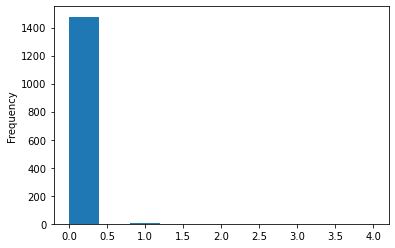

In [24]:
df.isna().sum(1).resample('1d').max().plot(kind='hist')

In [25]:
df.isna().sum(1).resample('1d').max().unique()

array([ 0.,  1., nan,  4.])

In [35]:
with open('models/impute_map.pkl', 'wb') as fp:
    pickle.dump(maps, fp)

### Save dataset cuts

In [40]:
df.loc['2016-05-03 09:40': '2019-12-01 00:00', 'dataset'] = 'train'
df.loc['2019-12-01 00:00':, 'dataset'] = 'test'

In [41]:
df.to_csv("df2.csv")